## 1.	Faça uma análise exploratória dos dados (EDA), demonstrando as principais características entre as variáveis e apresentando algumas hipóteses de negócio relacionadas

## Dicionário dos dados ## 

A base de dados de treinamento contém 16 colunas. Seus nomes são auto-explicativos, mas, caso haja alguma dúvida, a descrição das colunas é:

id – Atua como uma chave exclusiva para cada anúncio nos dados do aplicativo

nome - Representa o nome do anúncio

host_id - Representa o id do usuário que hospedou o anúncio

host_name – Contém o nome do usuário que hospedou o anúncio

bairro_group - Contém o nome do bairro onde o anúncio está localizado

bairro - Contém o nome da área onde o anúncio está localizado

latitude - Contém a latitude do local

longitude - Contém a longitude do local

room_type – Contém o tipo de espaço de cada anúncio

price - Contém o preço por noite em dólares listado pelo anfitrião

minimo_noites - Contém o número mínimo de noites que o usuário deve reservar

numero_de_reviews - Contém o número de comentários dados a cada listagem

ultima_review - Contém a data da última revisão dada à listagem

reviews_por_mes - Contém o número de avaliações fornecidas por mês

calculado_host_listings_count - Contém a quantidade de listagem por host

disponibilidade_365 - Contém o número de dias em que o anúncio está disponível para reserva

In [126]:
# Importando bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [127]:
df = pd.read_csv('teste_indicium_precificacao.csv')
df

,id,nome,host_id,host_name,bairro_group,bairro,latitude,longitude,room_type,price,minimo_noites,numero_de_reviews,ultima_review,reviews_por_mes,calculado_host_listings_count,disponibilidade_365
0,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
1,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
2,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
3,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
4,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48889,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48890,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48891,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48892,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


In [128]:
# Verificando a existencia de valores nulos
df.isnull().sum()

id                                   0
nome                                16
host_id                              0
host_name                           21
bairro_group                         0
bairro                               0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimo_noites                        0
numero_de_reviews                    0
ultima_review                    10052
reviews_por_mes                  10052
calculado_host_listings_count        0
disponibilidade_365                  0
dtype: int64

As variáveis **nome** e **host_name**  apresentam poucos valores nulos. Entre tanto, ambas variáveis não serão importantes para as analises subsequentes.

Já as variáveis **ultima_review** e **reviews_por_mes** exibem uma quantidade de valores nulos igual a 10052. A variável **ultima_review** não será importante para a análise, já a variável **reviews_por_mes** sim. Portanto os valores nulos serão substituídos por 0.

In [129]:
# Substituindo valoes NaN por 0 na variavel review_por_mes
df['reviews_por_mes'] = df['reviews_por_mes'].replace(to_replace=np.nan, value=0).astype('int64')

Assim como **nome**, **host_name** e **ultima_review** as variáveis **id** e **host_id** não são significantes para a presente análise. Portanto, as vaiáveis mencionadas serão removidas do df.

In [130]:
# Removendo as variaveis **nome**, **host_nome**, **ultima_review**, **id** e **host_id**

df = df.drop(['nome', 'host_name', 'ultima_review', 'id', 'host_id'], axis=1)

In [131]:
# Verificando novo df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48894 entries, 0 to 48893
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   bairro_group                   48894 non-null  object 
 1   bairro                         48894 non-null  object 
 2   latitude                       48894 non-null  float64
 3   longitude                      48894 non-null  float64
 4   room_type                      48894 non-null  object 
 5   price                          48894 non-null  int64  
 6   minimo_noites                  48894 non-null  int64  
 7   numero_de_reviews              48894 non-null  int64  
 8   reviews_por_mes                48894 non-null  int64  
 9   calculado_host_listings_count  48894 non-null  int64  
 10  disponibilidade_365            48894 non-null  int64  
dtypes: float64(2), int64(6), object(3)
memory usage: 4.1+ MB


In [132]:
# Verificando valores únicos das variaveis
print(f'A variável *price* possui valores únicos = {df["price"].nunique()}')
print(f'A variável *minimo_noites* possui valores únicos = {df["minimo_noites"].nunique()}')
print(f'A variável *numero_de_reviews* possui valores únicos = {df["numero_de_reviews"].nunique()}')
print(f'A variável *reviews_por_mes* possui valores únicos = {df["reviews_por_mes"].nunique()}')
print(f'A variável *calculado_host_listings_count* pssui valores únicos = {df["calculado_host_listings_count"].nunique()}')
print(f'A variável *disponibilidade_365* possui valores únicos = {df["disponibilidade_365"].nunique()}')
print(f'A variável *latitude* possui valores únicos = {df["latitude"].nunique()}')
print(f'A variável *longitude* possui valores únicos = {df["longitude"].nunique()}')
print(f'A variavel *bairro* possui valores únicos = {df["bairro"].nunique()}')
print(f'A variável *bairro_group* possui valores únicos = {df["bairro_group"].nunique()}')
print(f'A variável *room_type* possui valores únicos = {df["room_type"].nunique()}')

A variável *price* possui valores únicos = 674
A variável *minimo_noites* possui valores únicos = 109
A variável *numero_de_reviews* possui valores únicos = 394
A variável *reviews_por_mes* possui valores únicos = 22
A variável *calculado_host_listings_count* pssui valores únicos = 47
A variável *disponibilidade_365* possui valores únicos = 366
A variável *latitude* possui valores únicos = 19048
A variável *longitude* possui valores únicos = 14718
A variavel *bairro* possui valores únicos = 221
A variável *bairro_group* possui valores únicos = 5
A variável *room_type* possui valores únicos = 3


In [133]:
# Verificando dados das variáveis categóricas
df[["bairro", "bairro_group", "room_type"]].describe()

,bairro,bairro_group,room_type
count,48894,48894,48894
unique,221,5,3
top,Williamsburg,Manhattan,Entire home/apt
freq,3920,21661,25409


Análise das Variáveis Categóricas:

- Variável **bairro**

Total de registros (count): 48.894\
Número de valores únicos (unique): 221 bairros diferentes.\
Bairro mais frequente (top): Williamsburg\
Frequência do bairro mais comum (freq): 3.920 anúncios.\
Observação: Williamsburg é o bairro com maior número de acomodações anunciadas.

- Variável **bairro_group**

Total de registros (count): 48.894\
Número de valores únicos (unique): 5 grupos de bairros.\
Grupo de bairro mais frequente (top): Manhattan\
Frequência do grupo mais comum (freq): 21.661 anúncios.\
Observação: Manhattan é o grupo de bairros com a maior concentração de acomodações.

- Variável **room_type** 

Total de registros (count): 48.894\
Número de valores únicos (unique): 3 tipos de acomodações disponíveis.\
Tipo de acomodação mais frequente (top): Entire home/apt (Casa/Apartamento inteiro).\
Frequência do tipo mais comum (freq): 25.409 anúncios.\
Observação: A maioria das acomodações são casas ou apartamentos inteiros, sendo a opção mais anunciada.


In [134]:
# Verificando dados estatatisticos do df
df.describe()

,latitude,longitude,price,minimo_noites,numero_de_reviews,reviews_por_mes,calculado_host_listings_count,disponibilidade_365
count,48894.000000,48894.000000,48894.000000,48894.000000,48894.000000,48894.000000,48894.000000,48894.000000
mean,40.728951,-73.952169,152.720763,7.030085,23.274758,0.806275,7.144005,112.776169
std,0.054529,0.046157,240.156625,20.510741,44.550991,1.502778,32.952855,131.618692
min,40.499790,-74.244420,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,40.690100,-73.983070,69.000000,1.000000,1.000000,0.000000,1.000000,0.000000
50%,40.723075,-73.955680,106.000000,3.000000,5.000000,0.000000,1.000000,45.000000
75%,40.763117,-73.936273,175.000000,5.000000,24.000000,1.000000,2.000000,227.000000
max,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.000000,327.000000,365.000000


Selecionando a variável **price** no quadro do comando **describe** pode-se observar que: 

O **desvio padrão (str) = 240,15**: Indica uma que há uma alta dispersão nos valores, demonstrando grande variação nos preços.

**O mínimo (min) = 0**: Aponta que há registros de acomodações com preço zero, o que pode ser um erro ou representar anúncios promocionais.

**Percentis:**

25% (primeiro quartil): 69.00

50% (mediana): 106.00

75% (terceiro quartil): 175.00

Os valores de percentis indicam que 50% dos preços estão abaixo de 106, e 75% abaixo de 175.

**Máximo (max) = 10.000,00**: A grande diferença entre os quartis e o valor máximo sugere a presença de outliers.


Após a análise do **describe** é viável explorar melhor a variável **price** utilizando ferramentas visuais. 




<AxesSubplot:xlabel='price', ylabel='Count'>

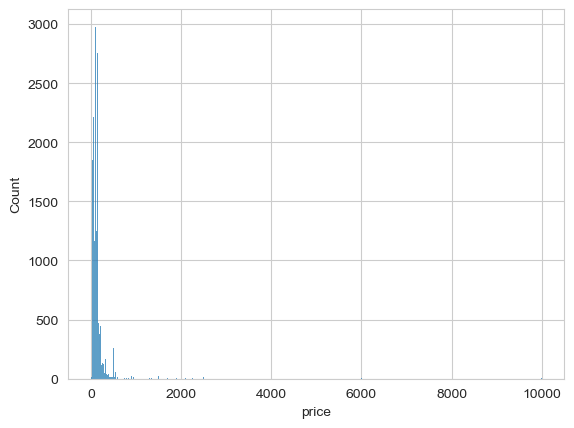

In [135]:
#Distribuição via histograma dos valores da variável **price**
sns.histplot(data = df, x = df["price"])

Quando analisado a figura do histograma é notório que a distribuição é altamente assimétrica com uma calda à direita, indicando a prezença de outliers com preços altos.\
A maioria dos preços está concentrada em valores baixos entre 0 e aproximadamente 500.

<AxesSubplot:xlabel='price'>

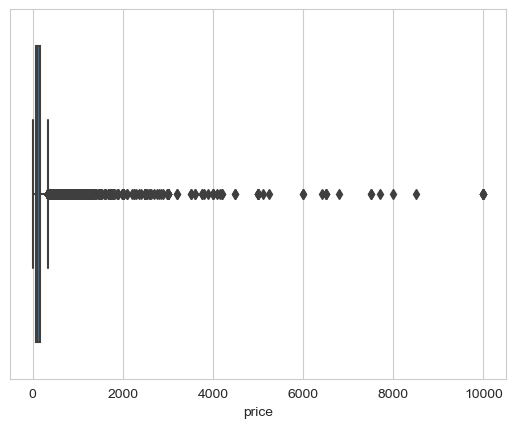

In [136]:
# Boxplot dos valores da variável **price**
sns.boxplot(data = df, x = df["price"])

Pela analise do boxplot da variável **price** é evidente apresença de outliers.\
Par auma melhor anaise  eposteriomenta a implementação de modelos de Machine Learning se faz necessário a elminação/suavização dos outliers.\
Para isso a implemtação da técnica IQR é necessária.\
A IQR é uma maneira estatística de identificar e remover outliers baseada na dispersão dos dados. As vantagens da IQR são; mantém a maior part dos dados, excluindo apenas valores muitodiscrepantes e não depende de suposições sobre a dustribuição dos dados.

In [137]:
# Implementando IQR

# Obtendo o prmeito quartil e o terceiro quartil
q1 = df["price"].quantile(0.25)
q3 = df["price"].quantile(0.75)

# Calculando o IQR
iqr = q3 - q1

#Definindo limites para outliers
lim_inf = q1 - (1.5*iqr)
lim_sup = q3 + (1.5*iqr)

# Filtando os dados
df_novo = df[(df["price"] >= lim_inf) & (df["price"] <= lim_sup)]
df_novo.shape

(45922, 11)

<AxesSubplot:xlabel='price', ylabel='Count'>

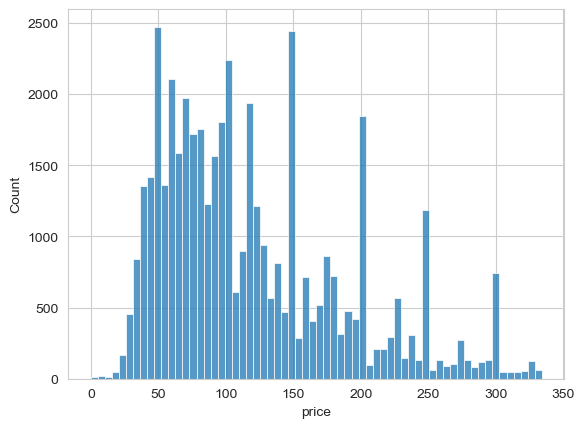

In [138]:
#Distribuição via histograma dos valores da variável **price**
sns.histplot(data = df_novo, x = df_novo["price"])

<AxesSubplot:xlabel='price'>

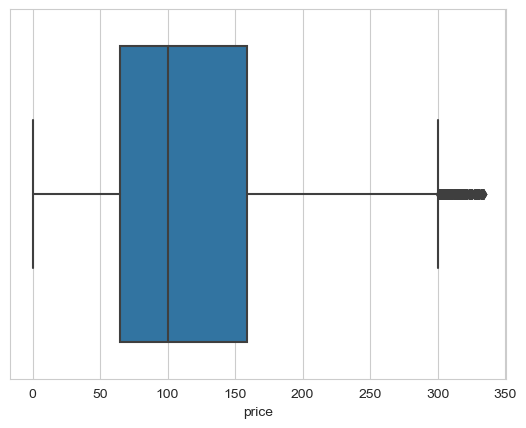

In [139]:
# Boxplot dos valores da variável **price**
sns.boxplot(data = df_novo, x = df_novo["price"])

Após a implementação do IQR a figura de distribuição e o boxplot apresentem um número significativamente menor de outliers.\
A faixa de preços cobrados no Airbnb apresenta ser de 20 a aproximadamente 330, com a distribuição de preços com picos na faixa de 50 a 150. Por fim, é provável que preços acima de 250 os anúncios são menores, pois a densidade cai significativamente após esse valor de faixa.

In [140]:
# Verificando os dados estatisticos após implementação do IQR
df_novo.describe()

,latitude,longitude,price,minimo_noites,numero_de_reviews,reviews_por_mes,calculado_host_listings_count,disponibilidade_365
count,45922.00000,45922.000000,45922.000000,45922.00000,45922.000000,45922.000000,45922.000000,45922.000000
mean,40.72849,-73.950733,119.969688,6.93820,23.942990,0.819106,6.639715,109.373133
std,0.05533,0.046471,68.150755,19.85802,45.315659,1.518641,31.008486,130.275350
min,40.49979,-74.244420,0.000000,1.00000,0.000000,0.000000,1.000000,0.000000
25%,40.68924,-73.981928,65.000000,1.00000,1.000000,0.000000,1.000000,0.000000
50%,40.72177,-73.954365,100.000000,2.00000,5.000000,0.000000,1.000000,39.000000
75%,40.76339,-73.934313,159.000000,5.00000,24.000000,1.000000,2.000000,217.000000
max,40.91306,-73.712990,334.000000,1250.00000,629.000000,58.000000,327.000000,365.000000


Após a implementação do IQR a diferença entre os quartis e o desvio padrão para variável **price** diminuiu.

# Análise de variáveis #
### 1) Variável **bairro_group** ###

In [141]:
# Varificando categorias na variável **bairro_group**
list(df_novo["bairro_group"].unique())

['Manhattan', 'Brooklyn', 'Queens', 'Staten Island', 'Bronx']

In [142]:
# Contagem por **bairro_group**
df_novo["bairro_group"].value_counts()


Manhattan        19506
Brooklyn         19414
Queens            5567
Bronx             1070
Staten Island      365
Name: bairro_group, dtype: int64

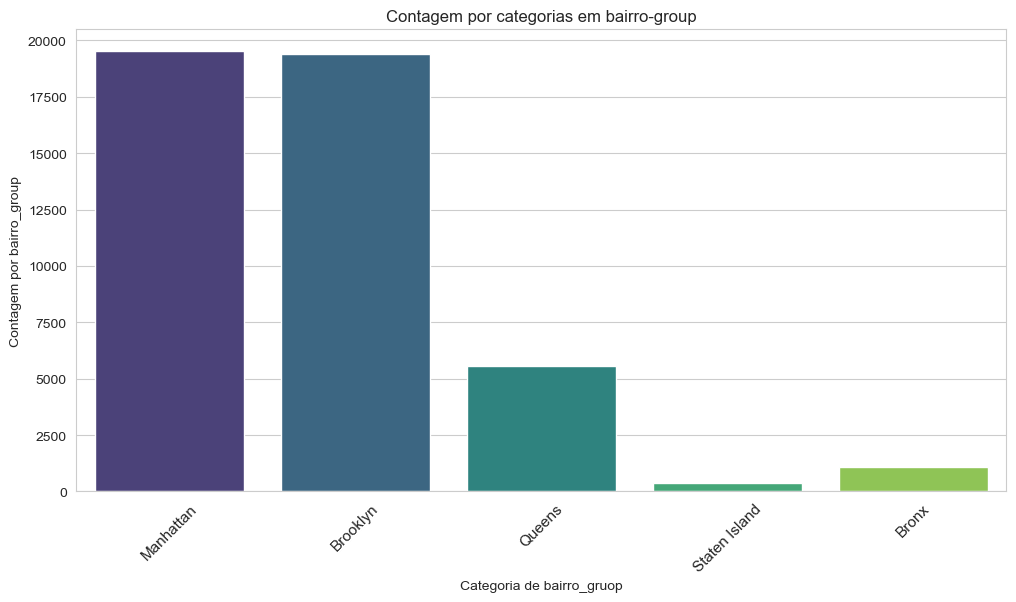

In [143]:
# Plot
sns.set_style("whitegrid")
plt.figure(figsize=(12, 6))
sns.countplot(data = df_novo, x = df_novo["bairro_group"], palette='viridis')
plt.title('Contagem por categorias em bairro-group')
plt.xlabel('Categoria de bairro_gruop')
plt.ylabel('Contagem por bairro_group')
plt.xticks(rotation=45, fontsize=11)
plt.show()

OBS:\
Manhattan e Brooklyn lideram o número de listagens no Airbnb, com mais de 19.000 cada. Queens e Bronx têm menos listagens, com 5.567 e 1.070, respectivamente. Staten Island tem o menor número, apenas 365. A concentração de listagens é maior em Manhattan e Brooklyn, possivelmente devido à maior demanda ou à disposição dos proprietários de anunciar suas propriedades.

In [144]:
#### 1.1) **bairro_group** / **price**

In [145]:
# Média de preço por categoria da variável bairro_group
media_bg = df_novo.groupby("bairro_group", as_index=False)["price"].mean()
media_bg

,bairro_group,price
0,Bronx,77.365421
1,Brooklyn,105.697383
2,Manhattan,145.952835
3,Queens,88.904437
4,Staten Island,89.235616


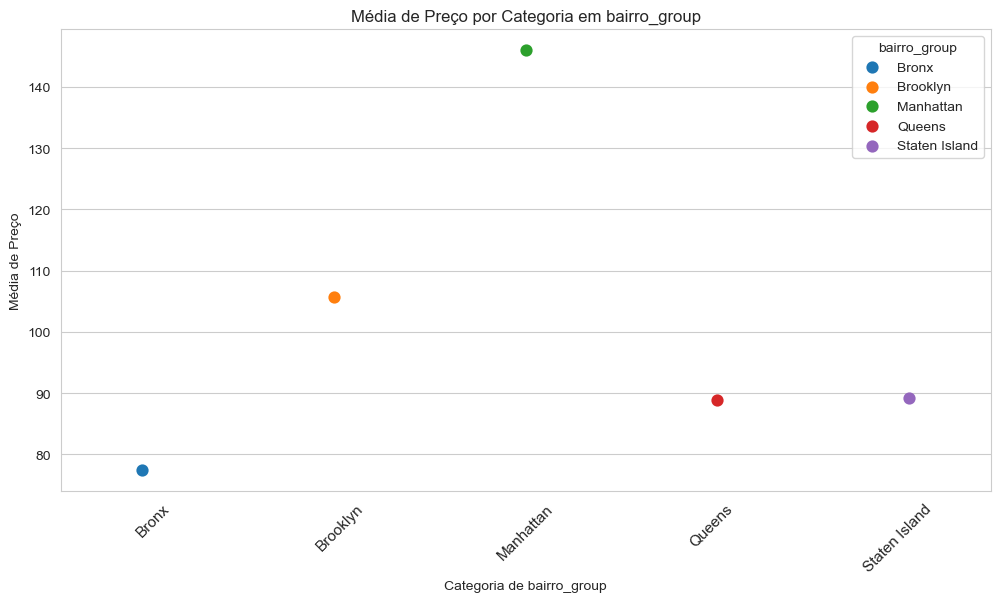

In [146]:
# Plot
sns.set_style("whitegrid")
plt.figure(figsize=(12, 6))
sns.pointplot(data=media_bg, x = "bairro_group", y="price", hue="bairro_group", dodge=True)
plt.title('Média de Preço por Categoria em bairro_group')
plt.xlabel('Categoria de bairro_group')
plt.ylabel('Média de Preço')
plt.xticks(rotation=45, fontsize=11)
plt.show()

OBS:\
O preço médio varia significativamente entre diferentes categorias do **bairro_group**, com Manhattan tendo o maior preço médio de 146 e o Bronx tendo o menor perto de 77. O preço médio no Queens e Staten Island é relativamente semelhante.

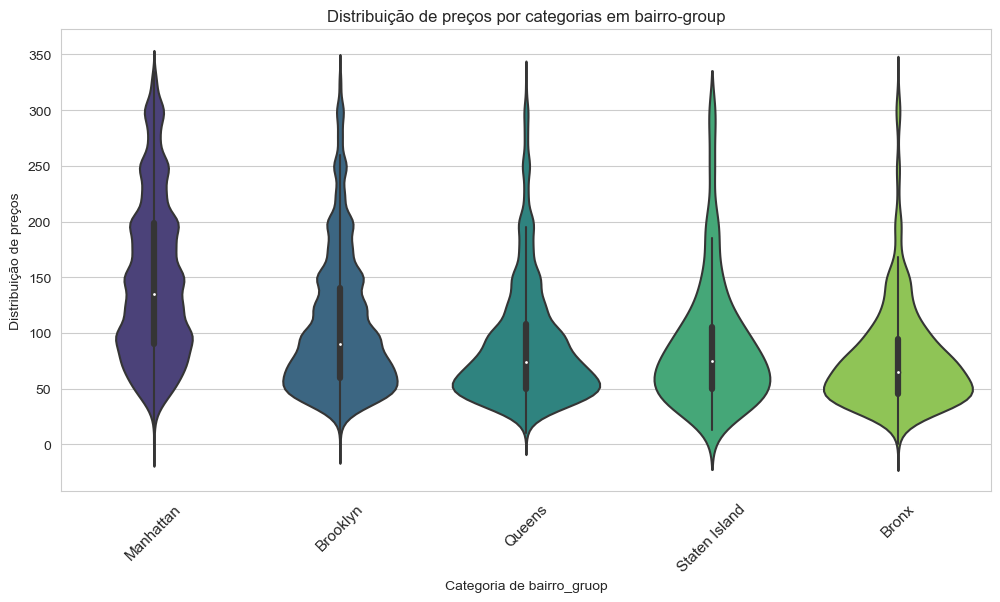

In [147]:
# Distribuição variável **bairro_group**
sns.set_style("whitegrid")
plt.figure(figsize=(12, 6))
sns.violinplot(data = df_novo, x = df_novo["bairro_group"], y = df_novo["price"], palette='viridis')
plt.title('Distribuição de preços por categorias em bairro-group')
plt.xlabel('Categoria de bairro_gruop')
plt.ylabel('Distribuição de preços')
plt.xticks(rotation=45, fontsize=11)
plt.show()


OBS:\
Analisando o grafico de distribuição de violino é possível constatar que a distribuição de preços é muito alta em Manhattan e Brooklyn. mas Manhattan tem mais diversidade na faixa de preços.\
Queens e Bronx têm distribuições de preços semelhantes.

#### 1.2) **bairro_group** / **numero_de_reviews**

In [148]:
# Número de reviews por categoria de bairro_group
bg_nr = df_novo.groupby("bairro_group", as_index=False)["numero_de_reviews"].sum()
bg_nr

,bairro_group,numero_de_reviews
0,Bronx,28185
1,Brooklyn,475927
2,Manhattan,428143
3,Queens,155719
4,Staten Island,11536


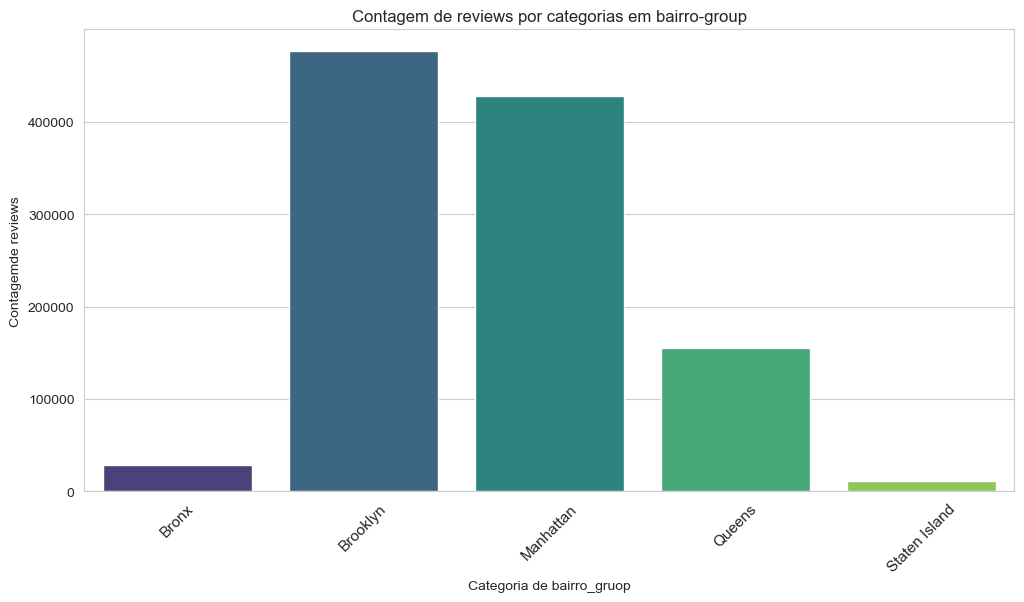

In [149]:
# Plot
sns.set_style("whitegrid")
plt.figure(figsize=(12, 6))
sns.barplot(data = bg_nr, x = "bairro_group", y= "numero_de_reviews", palette='viridis')
plt.title('Contagem de reviews por categorias em bairro-group')
plt.xlabel('Categoria de bairro_gruop')
plt.ylabel('Contagemde reviews')
plt.xticks(rotation=45, fontsize=11)
plt.show()

#### 1.3) **bairro_group** / **reviews_por_mes**

In [150]:
# Número de reviews por mês por categoria de bairro_group
rm_bg = df_novo.groupby("bairro_group", as_index=False)["reviews_por_mes"].sum()
rm_bg

,bairro_group,reviews_por_mes
0,Bronx,1240
1,Brooklyn,14902
2,Manhattan,14001
3,Queens,7019
4,Staten Island,453


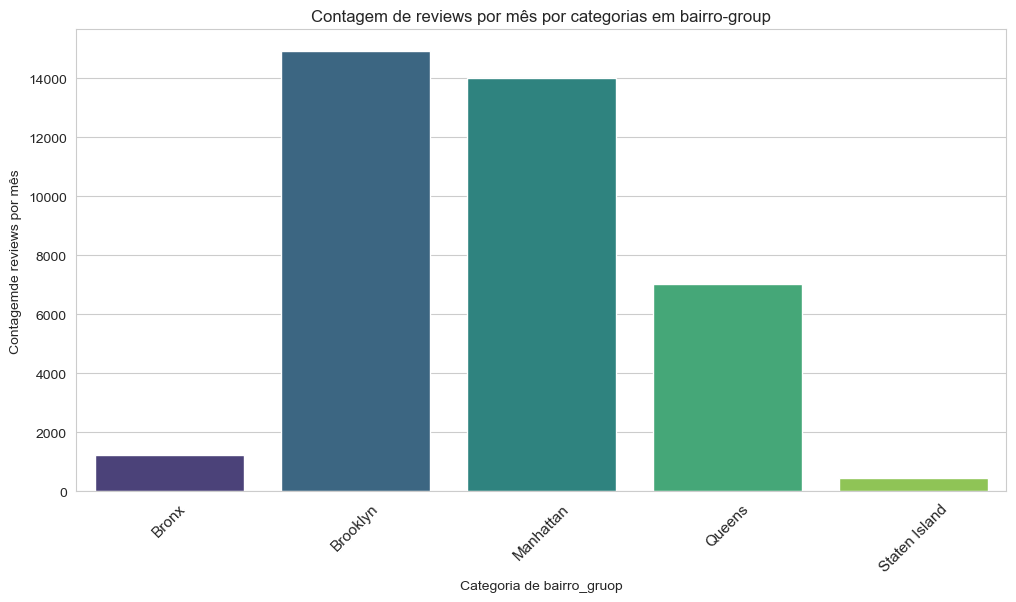

In [151]:
# Plot
sns.set_style("whitegrid")
plt.figure(figsize=(12, 6))
sns.barplot(data = rm_bg, x = "bairro_group", y= "reviews_por_mes", palette='viridis')
plt.title('Contagem de reviews por mês por categorias em bairro-group')
plt.xlabel('Categoria de bairro_gruop')
plt.ylabel('Contagemde reviews por mês')
plt.xticks(rotation=45, fontsize=11)
plt.show()

#### 1.4) **bairro_group** / **disponibilidade_365**

In [152]:
# Média de disponibilidade por categoria de bairro_grup 
d_bg = df_novo.groupby("bairro_group", as_index=False)["disponibilidade_365"].mean()
d_bg

,bairro_group,disponibilidade_365
0,Bronx,164.564486
1,Brooklyn,98.486917
2,Manhattan,105.884138
3,Queens,143.019041
4,Staten Island,199.893151


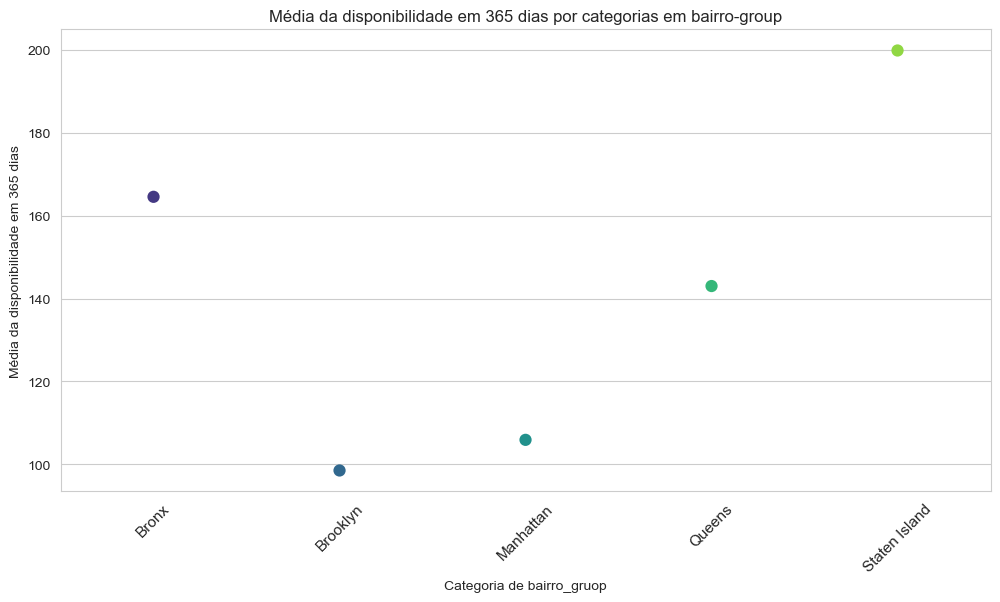

In [153]:
# Plot
sns.set_style("whitegrid")
plt.figure(figsize=(12, 6))
sns.pointplot(data = d_bg, x = "bairro_group", y= "disponibilidade_365", palette='viridis')
plt.title('Média da disponibilidade em 365 dias por categorias em bairro-group')
plt.xlabel('Categoria de bairro_gruop')
plt.ylabel('Média da disponibilidade em 365 dias')
plt.xticks(rotation=45, fontsize=11)
plt.show()

OBS:\
Pela figura os locais Manhatan e Brooklyn possuem uma média de disponibilidade menor que os demais. Isso é devido a uma provável maior procura por esses locais.

#### 1.5) **bairro_group** / **room_type**

In [154]:
# Contagem de room_type por categoria de bairro_group
bg_rt = df_novo.groupby(["bairro_group", "room_type"]).size().reset_index(name='counts')
bg_rt

,bairro_group,room_type,counts
0,Bronx,Entire home/apt,363
1,Bronx,Private room,648
2,Bronx,Shared room,59
3,Brooklyn,Entire home/apt,8942
4,Brooklyn,Private room,10061
5,Brooklyn,Shared room,411
6,Manhattan,Entire home/apt,11294
7,Manhattan,Private room,7747
8,Manhattan,Shared room,465
9,Queens,Entire home/apt,2022


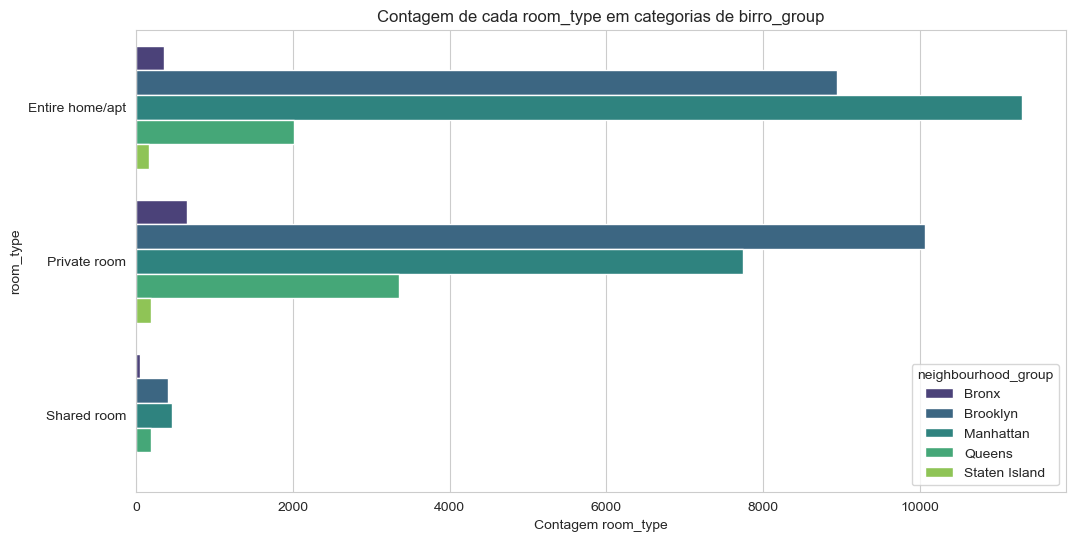

In [155]:
# Plot
sns.set_style("whitegrid")
plt.figure(figsize=(12, 6))
sns.barplot(data=bg_rt, x="counts", y="room_type", hue="bairro_group", palette='viridis')
plt.title('Contagem de cada room_type em categorias de birro_group')
plt.xlabel('Contagem room_type')
plt.ylabel('room_type')
plt.legend(title='neighbourhood_group', loc='best')

OBS:\
Para Bronx, Brookly e Staten Island os quarto individuais são os mais listados.\
Já para Manhattan apartamentos e casas inteiras possuem maior frequência de listagem.

### 2) Variável **room_type**

In [156]:
df_novo["room_type"].nunique()

3

In [157]:
# Varificando categorias na variável **bairro**
list(df_novo["room_type"].unique())

['Entire home/apt', 'Private room', 'Shared room']

In [158]:
c_rt = df_novo["room_type"].value_counts()
c_rt

Entire home/apt    22789
Private room       21995
Shared room         1138
Name: room_type, dtype: int64

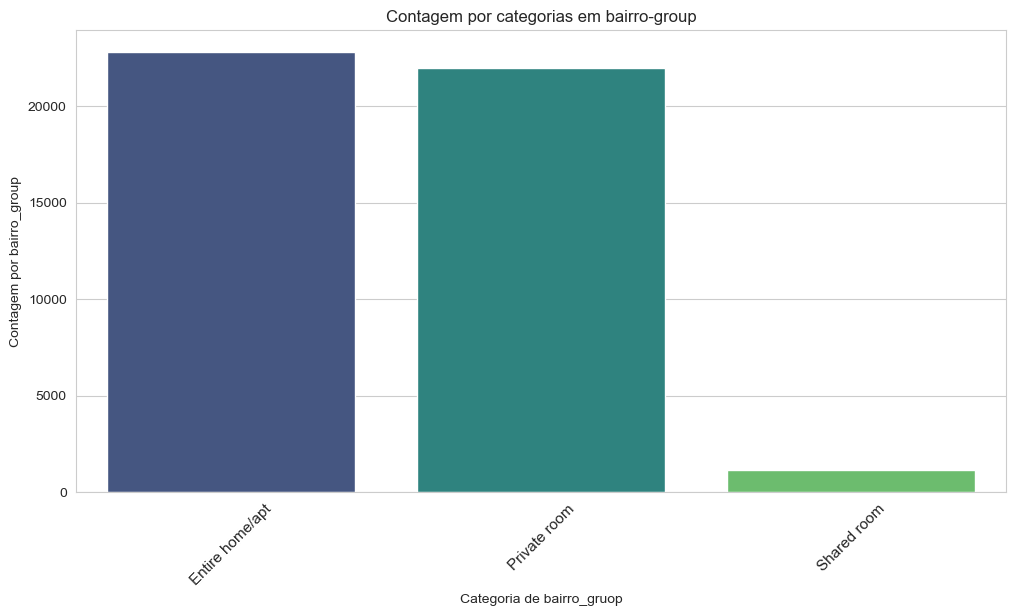

In [159]:
# Plot
sns.set_style("whitegrid")
plt.figure(figsize=(12, 6))
sns.countplot(data = df_novo, x = df_novo["room_type"], palette='viridis')
plt.title('Contagem por categorias em bairro-group')
plt.xlabel('Categoria de bairro_gruop')
plt.ylabel('Contagem por bairro_group')
plt.xticks(rotation=45, fontsize=11)
plt.show()

OBS:\
Apartamentos ou casas inteiro são os mais listados com 22789. Porém, quartos privativos também apresentam valores altos de listagem com um total de 21995. Diferenciando de maneira drástica de quartos compartilhados com um total de listagem de apenas 1138.

#### 2.1) **room_type** / **price**

In [160]:
# Média de preço por **room_type**

rt_p = df_novo.groupby("room_type", as_index=False)["price"].mean()
rt_p

,room_type,price
0,Entire home/apt,162.527096
1,Private room,79.015322
2,Shared room,59.293497


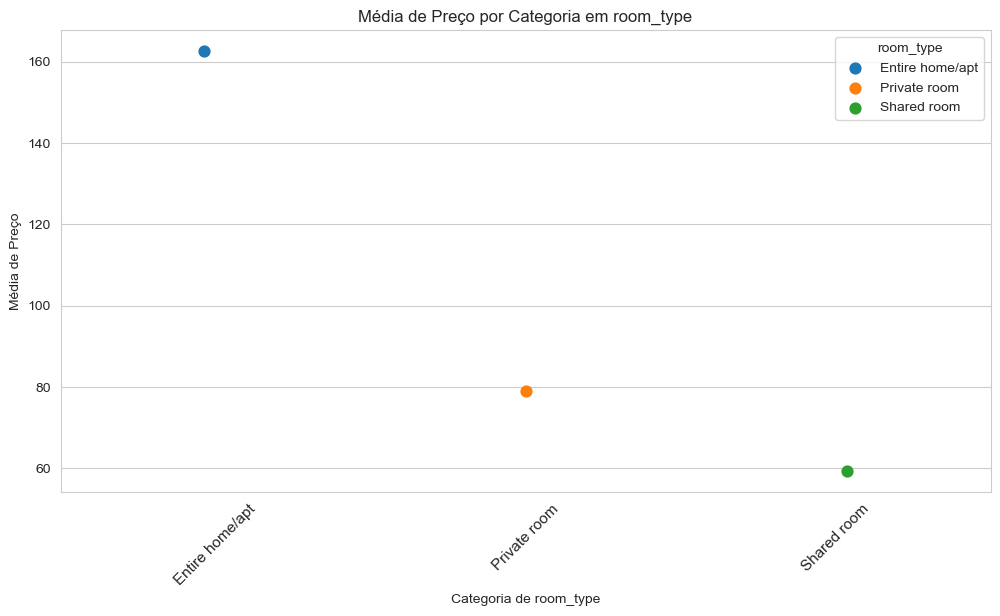

In [161]:
# Plot
sns.set_style("whitegrid")
plt.figure(figsize=(12, 6))
sns.pointplot(data=rt_p, x = "room_type", y="price", hue="room_type", dodge=True)
plt.title('Média de Preço por Categoria em room_type')
plt.xlabel('Categoria de room_type')
plt.ylabel('Média de Preço')
plt.xticks(rotation=45, fontsize=11)
plt.show()

OBS:\
Apartamentos e casas listadas por inteiro possuem uma média de preço significativamente maior que quartos privado e quartos compartilhados. 

Sendo:

Média de preço para casas e apartamentos inteiros: 162,52\
Média de preços para quartos privados: 79,01\
Média de preços para quartos compartilhados: 59,29

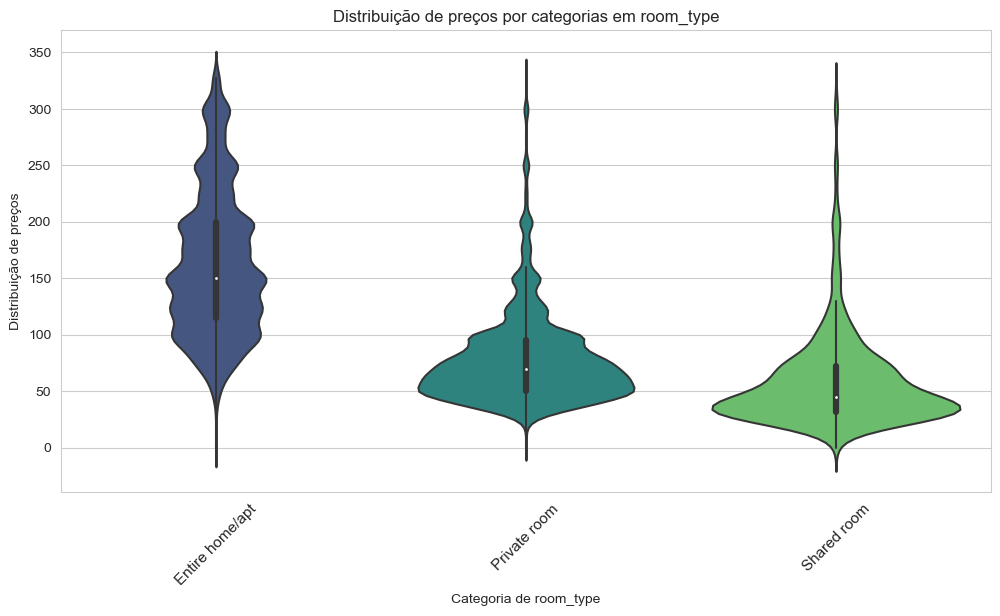

In [162]:
# Distribuição do preço por categoria de **room_type**
sns.set_style("whitegrid")
plt.figure(figsize=(12, 6))
sns.violinplot(data = df_novo, x = df_novo["room_type"], y = df_novo["price"], palette='viridis')
plt.title('Distribuição de preços por categorias em room_type')
plt.xlabel('Categoria de room_type')
plt.ylabel('Distribuição de preços')
plt.xticks(rotation=45, fontsize=11)
plt.show()

OBS:\
Casas e Apartamentos inteiros possuem uma destruição de preços mais uniforme quando comparada com as categorias de quarto privado e quarto compartilhado.\
Quarto compartilhado e privado concentra-se em valores próximos a 50.

#### 2.2) **room_type** / **numero_de_reviews**

In [163]:
# Número de reviews por tipo (room_type)
rt_ndr = df_novo.groupby("room_type", as_index=False)["numero_de_reviews"].sum()
rt_ndr

,room_type,numero_de_reviews
0,Entire home/apt,543573
1,Private room,536736
2,Shared room,19201


#### 2.3) **room_type** / **reviews_por_mes**

In [164]:
# Número de reviews por mês por categoria de room_type
rt_rpm = df_novo.groupby("room_type",as_index=False)["reviews_por_mes"].sum()
rt_rpm

,room_type,reviews_por_mes
0,Entire home/apt,17766
1,Private room,18922
2,Shared room,927


#### 2.4) **room_type** / **disponibilidade_365**

In [165]:
# Disponibilidade em 365 dias por categoria de room_type
rt_d = df_novo.groupby("room_type", as_index=False)["disponibilidade_365"].mean()
rt_d

,room_type,disponibilidade_365
0,Entire home/apt,106.119400
1,Private room,109.966947
2,Shared room,163.053603


### 3) Variáveis **Latitude** e **Longitude**

#### 3.1) **latitude** e **longitude** /**bairro_group**

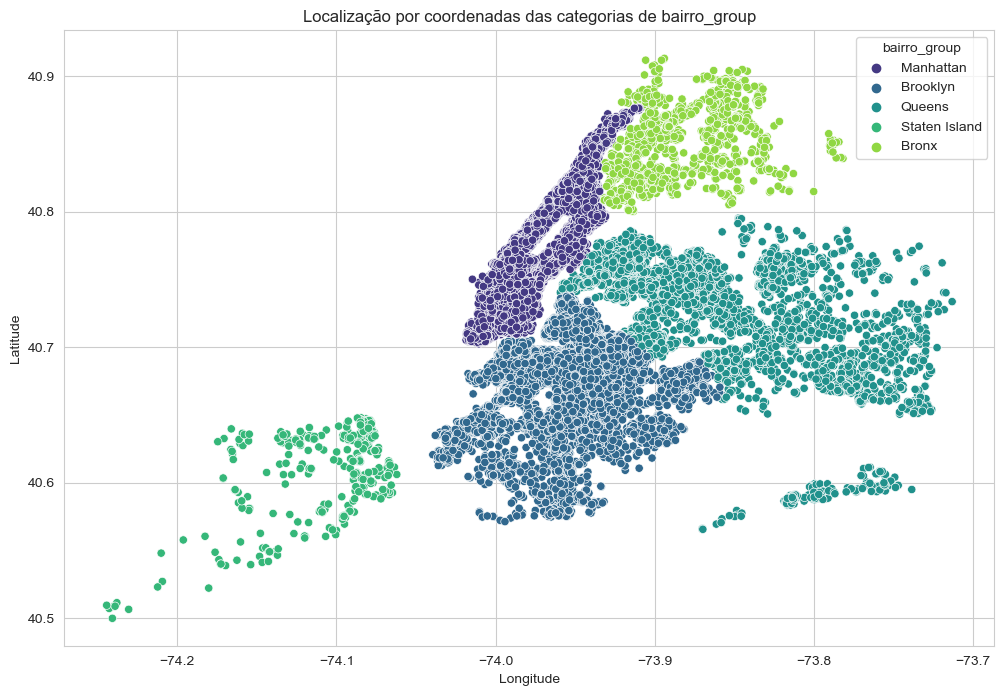

In [166]:
# Plot Latitude e Longitude por categoria de bairro_group
sns.set_style("whitegrid")
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df_novo, x = "longitude", y="latitude", 
                hue="bairro_group", palette='viridis')
plt.title('Localização por coordenadas das categorias de bairro_group')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

#### 3.2) **latitude** e **longitude** /**price**

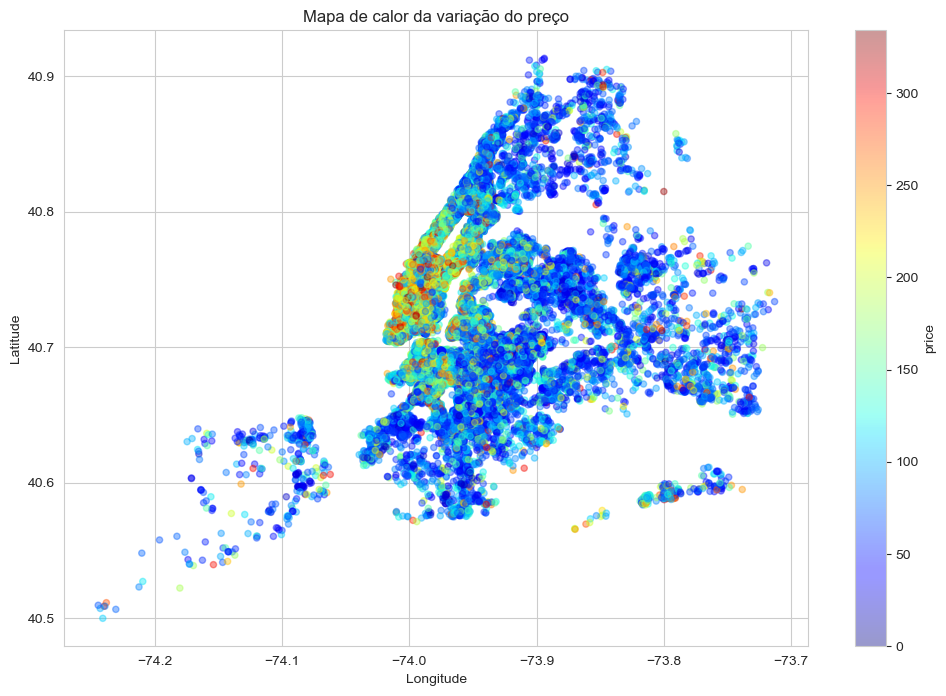

In [167]:
df_novo.plot(kind='scatter', x='longitude', y='latitude', 
             c='price',
             cmap=plt.get_cmap('jet'), 
             colorbar=True, alpha=0.4, figsize=(12, 8))
plt.title('Mapa de calor da variação do preço')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

OBS:\
Pela analise do mapa de calor dos preços as acomodações em Manhattan são alto valor, indicando que é o lugar mais caro quando comparados com as demais categorias do **bairro_group**

#### 3.3) **latitude** e **longitude** /**room_type**

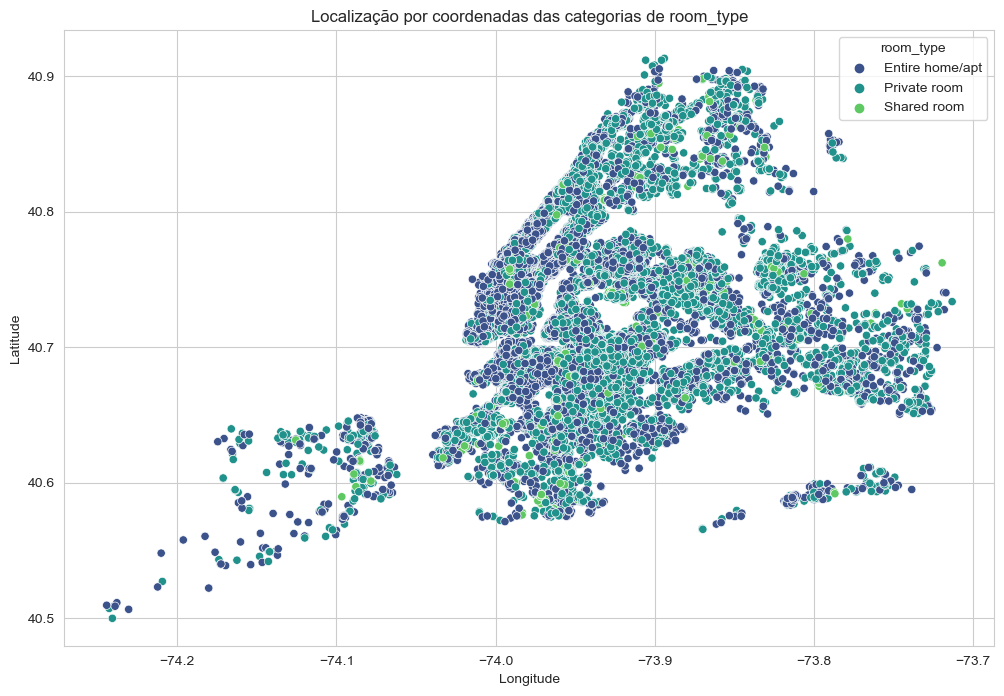

In [168]:
# Plot Latitude e Longitude por categoria de room_type
sns.set_style("whitegrid")
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df_novo, x = "longitude", y="latitude", hue="room_type", palette='viridis')
plt.title('Localização por coordenadas das categorias de room_type')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

OBS:\
A maior parte do tipos de acamodoções disponíveis são de quartos privados.\
Porém, Manhattan se destaca com um cluster mairo de Apartamentos e casa inteiras.

#### 3.4) **latitude** e **longitude** /**disponibilidade_365**

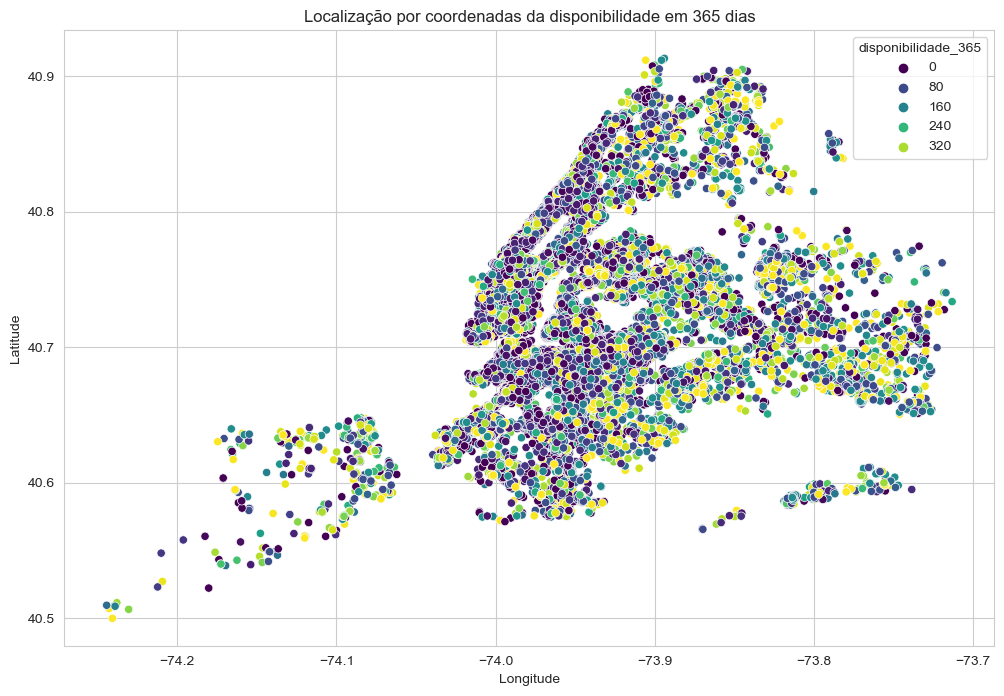

In [169]:
# Plot Latitude e Longitude por categoria de room_type
sns.set_style("whitegrid")
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df_novo, x = "longitude", y="latitude", hue="disponibilidade_365", palette='viridis')
plt.title('Localização por coordenadas da disponibilidade em 365 dias')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

OBS:\
Staten Island têm anúncios que estão disponíveis durante todo o ano.

## Responda também às seguintes perguntas:
#### a.	Supondo que uma pessoa esteja pensando em investir em um apartamento para alugar na plataforma, onde seria mais indicada a compra?

Para responder a pergunta "**a**" é interessnte considerar duas variaveis do problema, que são, preço e disponibilidade em 365 dias.\
Pela seção 1.1) **bairro_group** / **price**. Em que, a média dos preços são claculadas por **bairro_group** os valores da méda são:

Manhattan = 145.952835\
Brooklyn =	105.697383\
Staten Island =	89.235616\
Queens = 88.904437\
Bronx = 77.365421

Para a diponibiidade em 365 dias deve-se considerar a seção 1.4) **bairro_group**/ **disponibilidade_365**. Na qual, é calculado a média de disponibilidade por **bairro_group**, os valores da méda são:

Staten Island = 199.893151\
Bronx = 164.564486\
Queens = 143.019041\
Manhattan = 105.884138\
Brooklyn = 98.486917

Considerando que o objetivo do investidor é maximizar a rentabilidade do imóvel alugado, devemos analisar duas variáveis essenciais:

Preço médio por diária (**price**)
Número médio de dias disponíveis para aluguel (**disponibilidade_365**)
Uma forma de estimar a receita potencial anual de um imóvel em cada bairro seria calcular:

Receita Potencial Anual = Preco Médio × Disponibilidade Média

Isso nos ajudará a entender quais bairros oferecem maior potencial de faturamento ao longo do ano.

In [170]:
# Calculando receita anual média
df_2a = media_bg.merge(d_bg, on="bairro_group")
df_2a["receita_anual"] = df_2a["price"] * df_2a["disponibilidade_365"]
df_2a

,bairro_group,price,disponibilidade_365,receita_anual
0,Bronx,77.365421,164.564486,12731.600667
1,Brooklyn,105.697383,98.486917,10409.809383
2,Manhattan,145.952835,105.884138,15454.090157
3,Queens,88.904437,143.019041,12715.027280
4,Staten Island,89.235616,199.893151,17837.588523


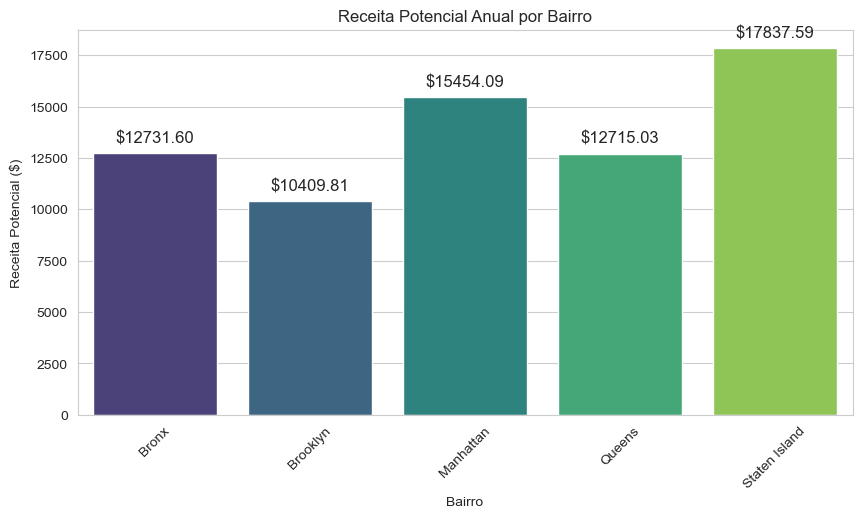

In [171]:
#Plot
plt.figure(figsize=(10, 5))
sns.barplot(data=df_2a, x="bairro_group", y="receita_anual", palette="viridis")

# Adicionando valores nas barras corretamente
for index, row in df_2a.iterrows():
    plt.text(index, row["receita_anual"] + 500, f'${row["receita_anual"]:.2f}', ha='center', fontsize=12)

plt.title("Receita Potencial Anual por Bairro")
plt.xlabel("Bairro")
plt.ylabel("Receita Potencial ($)")
plt.xticks(rotation=45)
plt.show()

Resposta pergunta "**a**":

Staten Island tem a maior Receita Potencial Anual ($17,818.67), o que sugere que pode ser um bom investimento devido à combinação de alta disponibilidade e um preço relativamente acessível.

### Pergunta b

b.	O número mínimo de noites e a disponibilidade ao longo do ano interferem no preço?

Para responder a pergunta "**b**" o estudo da correlação das variaáveis é uma maneira de avaliar a interferencia do número mínimo de noites e dispnibilidade no preço.
Para isso é usado o comando **.corr()** que calcular a correlação entre as colunas de um DataFrame. A correlação é uma medida estatística que descreve o grau de relação linear entre duas variáveis. Ela varia de -1 a 1, onde:

- 1 indica uma correlação positiva perfeita.

- -1 indica uma correlação negativa perfeita.

- 0 indica nenhuma correlação linear.

In [172]:
#Reestruturando df para melhor visualisação
df_novo = df_novo[["price", "minimo_noites", "disponibilidade_365","numero_de_reviews", "reviews_por_mes", "calculado_host_listings_count","latitude","longitude","bairro", "bairro_group", "room_type"]]

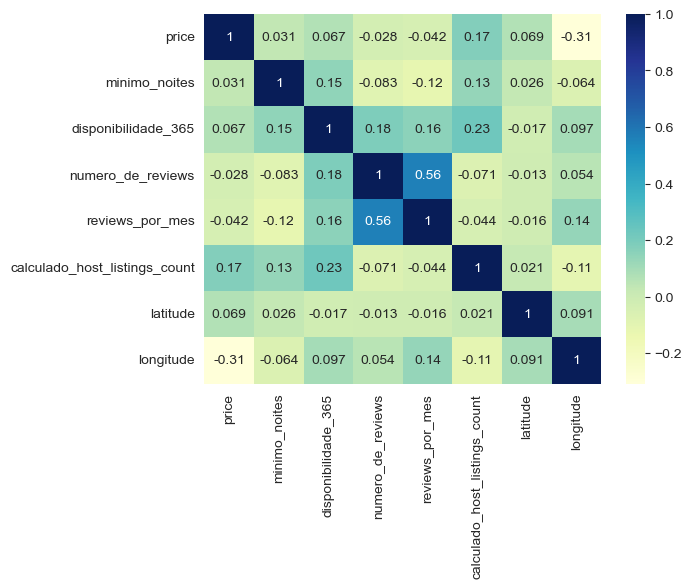

In [173]:
#plot correlação entre variáveis
sns.heatmap(df_novo.corr(), cmap="YlGnBu", annot=True)
plt.show()

Resposta pergunta "**b**":

Se gunto o mapa de calor das correlações as vaiáveis **minimo_noites** e **disponibilidade_365** com o **price**, são:

- Correlação entre preço e mínimo de noites: 0,031

- Correlação entre preço e disponibilidade: 0,067

Os valores de correlação fornecidos são muito baixos e estão próximos de zero. Isso indica que não há uma relação significativa entre o preço e essas duas variáveis. A exigência de um número mínimo de noites não tem uma influência significativa no preço. A disponibilidade também não parece interferir significativamente no preço.

### Pergunta C
c.	Existe algum padrão no texto do nome do local para lugares de mais alto valor?

In [174]:
#
pp = df_novo.groupby("bairro", as_index=False)["price"].mean()
pp.sort_values(by="price", ascending=False)

,bairro,price
214,Willowbrook,249.000000
138,Neponsit,237.000000
21,Breezy Point,213.333333
196,Tribeca,212.495327
143,NoHo,205.290909
...,...,...
50,Corona,54.412698
178,Soundview,53.466667
195,Tremont,51.545455
101,Hunts Point,50.500000


In [175]:
pb = df_novo.groupby("bairro_group", as_index=False)["bairro"].value_counts()
pb

,bairro_group,bairro,count
0,Bronx,Kingsbridge,69
1,Bronx,Fordham,63
2,Bronx,Longwood,60
3,Bronx,Mott Haven,59
4,Bronx,Concourse,50
...,...,...,...
214,Staten Island,Howland Hook,2
215,Staten Island,Rossville,1
216,Staten Island,Richmondtown,1
217,Staten Island,New Dorp,1


In [176]:
m = pd.merge(pp, pb, how = "inner")
m

,bairro,price,bairro_group,count
0,Allerton,78.756098,Bronx,41
1,Arden Heights,67.250000,Staten Island,4
2,Arrochar,89.500000,Staten Island,20
3,Arverne,135.097222,Queens,72
4,Astoria,96.747463,Queens,887
...,...,...,...,...
214,Willowbrook,249.000000,Staten Island,1
215,Windsor Terrace,127.046667,Brooklyn,150
216,Woodhaven,67.170455,Queens,88
217,Woodlawn,60.090909,Bronx,11


In [177]:
m.sort_values(by="price", ascending=False).head(10)

,bairro,price,bairro_group,count
214,Willowbrook,249.000000,Staten Island,1
138,Neponsit,237.000000,Queens,2
21,Breezy Point,213.333333,Queens,3
196,Tribeca,212.495327,Manhattan,107
143,NoHo,205.290909,Manhattan,55
208,West Village,193.118644,Manhattan,649
75,Flatiron District,188.090909,Manhattan,55
73,Financial District,183.973926,Manhattan,652
126,Midtown,181.082168,Manhattan,1144
91,Greenwich Village,180.304094,Manhattan,342


#### Resposta pergunta **c**

Na variável **bairro** não há padrão nas palavras que possa implicar em locais com valores mais altos.
Porem, quando considerado a variável **bairro_group** dentre os 10 locais mais caros de valores 7 se localizam em Manhattan.